In [34]:
d3_files = [["cross-validation results/output for d3 exhaustive NN.txt", "Exhaustive"],
            ["cross-validation results/output for d3 original NN.txt", "Original"],
            ["cross-validation results/output for d3 v2 1k NN.txt", "Rand \n(1,000 samples \nw/ repl)"],
            ["cross-validation results/output for d3 v2 10k NN.txt", "Rand \n(10,000 samples \nw/ repl)"],
            ["cross-validation results/output for d3 v2 100k NN.txt", "Rand \n(100,000 samples \nw/ repl)"],
            ["cross-validation results/output for d3 v3 1k NN.txt", "Rand \n(1,000 samples \nw/o repl)"],
            ["cross-validation results/output for d3 v3 10k NN.txt", "Rand \n(10,000 samples \nw/o repl)"]]




d5_files = [["cross-validation results/output for d5 original NN.txt", "Original"],
           ["cross-validation results/output for d5 v2 1k NN.txt", "Rand \n(1,000 samples \nw/ repl)"],
           ["cross-validation results/output for d5 v2 10k NN.txt", "Rand \n(10,000 samples \nw/ repl)"],
           ["cross-validation results/output for d5 v2 100k NN.txt", "Rand \n(100,000 samples \nw/ repl)"],
           ["cross-validation results/output for d5 v3 1k NN.txt", "Rand \n(1,000 samples \nw/o repl)"],
           ["cross-validation results/output for d5 v3 10k NN.txt", "Rand \n(10,000 samples \nw/o repl)"]]




d7_files = [["cross-validation results/output for d7 original NN.txt", "Original"],
           ["cross-validation results/output for d7 v2 1k NN.txt", "Rand \n(1,000 samples \nw/ repl)"],
           ["cross-validation results/output for d7 v2 10k NN.txt", "Rand \n(10,000 samples \nw/ repl)"],
           ["cross-validation results/output for d7 v2 100k NN.txt", "Rand \n(100,000 samples \nw/ repl)"],
           ["cross-validation results/output for d7 v2 500k NN.txt", "Rand \n(500,000 samples \nw/ repl)"],
           ["cross-validation results/output for d3 v3 1k NN.txt", "Rand \n(1,000 samples \nw/o repl)"]]

Stats for Exhaustive:
   Mean MWPM: 0.5073694583010792
   Std Dev MWPM: 0.27636618642721406
   Mean PLUT: 0.5110400348677708
   Std Dev PLUT: 0.2933874358451429
_______________________________________________
Stats for Original:
   Mean MWPM: 0.14183399143802583
   Std Dev MWPM: 0.26870610607417184
   Mean PLUT: 0.20792808640624316
   Std Dev PLUT: 0.3643050542210337
_______________________________________________
Stats for Rand 
(1,000 samples 
w/ repl):
   Mean MWPM: 0.05266471020438408
   Std Dev MWPM: 0.22940773523634167
   Mean PLUT: 0.0526338295090502
   Std Dev PLUT: 0.22941518895140478
_______________________________________________
Stats for Rand 
(10,000 samples 
w/ repl):
   Mean MWPM: 0.0671680118991342
   Std Dev MWPM: 0.23075702927192748
   Mean PLUT: 0.05639071154593181
   Std Dev PLUT: 0.22909034798155972
_______________________________________________
Stats for Rand 
(100,000 samples 
w/ repl):
   Mean MWPM: 0.05372841895542946
   Std Dev MWPM: 0.22919980100498547
   M

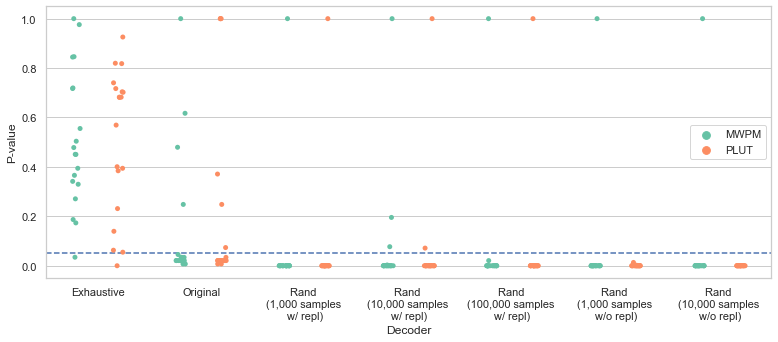

In [39]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import statistics as stat
import seaborn
import pandas as pd
from scipy.stats import chi2_contingency

data = []
csv_files = d3_files

for file, name in csv_files:

    mwpm = []
    plut = []

    mwpm_p = []
    plut_p = []

    with open(file) as fh:
        for line in fh:
            if line.startswith("X^2 for MWPM and NN:"):
                mwpm.append(float(line.replace('X^2 for MWPM and NN: ','')))
            elif line.startswith("X^2 for PLUT and NN:"):
                plut.append(float(line.replace('X^2 for PLUT and NN: ','')))

    for value in mwpm:
        mwpm_p.append(chi2.sf(value,1))
    for value in plut:
        plut_p.append(chi2.sf(value,1))
        
    print("Stats for " + name + ":")
    print("   Mean MWPM: " + str(sum(mwpm_p)/len(mwpm_p)))
    print("   Std Dev MWPM: " + str(stat.stdev(mwpm_p)))
    print("   Mean PLUT: " + str(sum(plut_p)/len(plut_p)))
    print("   Std Dev PLUT: " + str(stat.stdev(plut_p)))
    print("_______________________________________________")

    for value in mwpm_p:
        data.append([name,'MWPM',value])
    for value in plut_p:
        data.append([name,'PLUT',value])

df = pd.DataFrame(data, columns=['Decoder','Dataset','P-value'])

seaborn.set(style = 'whitegrid', rc={"figure.figsize":(13,5)})
       
seaborn.stripplot(x="Decoder", y="P-value", hue="Dataset",
                   data=df, palette="Set2", dodge=True)

plt.legend(loc='center right')
plt.axhline(0.05, linestyle='--')
plt.show()